In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlb
import sys
sys.path.append('/Users/yohai/workspace/faultSlip')
from faultSlip.inversion import Inversion
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [65]:
def plot_sources(
        inv,
        cmap_max=None,
        cmap_min=None,
        view=(30, 225),
        slip=None,
        title="Fault Geometry",
        I=None,
        aspect=(5, 5, 1)
):
    """
    This method plots the sources of the fault plains in the current object.
    
    The method creates a figure with three subplots, each showing a different slip component: the strike-slip, dip-slip, and total slip. The colormap and view angle can be customized.
    
    Parameters:
    cmap_max (float): The maximum value of the colormap.
    cmap_min (float): The minimum value of the colormap.
    view (tuple): A tuple containing the view angle above the horizon and the angle to rotate the plot.
    title (str): The title for the plot.
    I (int): The index of the fault plain to highlight.
    
    Returns:
    fig (matplotlib.figure.Figure): The figure containing the subplots.
    ax (matplotlib.axes.Axes): The axes containing the plotted fault sources.
    """

    def plot_s(
        ax,
        movment=None,
        plot_color_bar=True,
        cmap_max=1.0,
        cmap_min=0.0,
        cmap="jet",
        title="",
        I=-1,
    ):
        if movment is not None:

            my_cmap = plt.cm.get_cmap(cmap)
            norm = mlb.colors.Normalize(cmap_min, cmap_max)
            shift = 0
            for p in inv.plains:
                p.plot_sources(
                    movment[shift : shift + len(p.sources)], ax, my_cmap, norm
                )
                shift += len(p.sources)
        else:
            for i, p in enumerate(inv.plains):
                t = i == I
                p.plot_sources(movment, ax, cmap, I=t)
        if movment is not None and plot_color_bar:
            cmmapable = plt.cm.ScalarMappable(norm, my_cmap)
            cmmapable.set_array(np.linspace(cmap_min, cmap_max))
            cbar = plt.colorbar(cmmapable, fraction=0.015, pad=-0.1, aspect=10)
            cbar.set_label("slip [m]")

    fig = plt.figure(figsize=(10, 10))
    n = 0
    for p in inv.plains:
        n += len(p.sources)
    ss = slip[0:n]
    ds = slip[n : n * 2]
    total_slip = np.sqrt(ss ** 2 + ds ** 2)
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.view_init(*view)
    ax.set_box_aspect(aspect)
    if cmap_max is None:
        cmax = ss.max()
    else:
        cmax = cmap_max
    if cmap_min is None:
        cmin = ss.min()
    else:
        cmin = cmap_min
    plot_s(ax, ss, cmap_max=cmax, cmap_min=cmin, title="Strike Slip")
    # plt.tight_layout()
    return fig, ax

In [182]:
inv = Inversion('/Users/yohai/workspace/faultSlip/faultSlip/example/simple_inversion/example.json')

inv.calculate_station_disp()
# inv.drop_zero_station()
# inv.drop_crossing_station()
inv.build_kers()
inv.build_sources_mat()


(<Figure size 720x720 with 2 Axes>, <Axes3DSubplot:>)

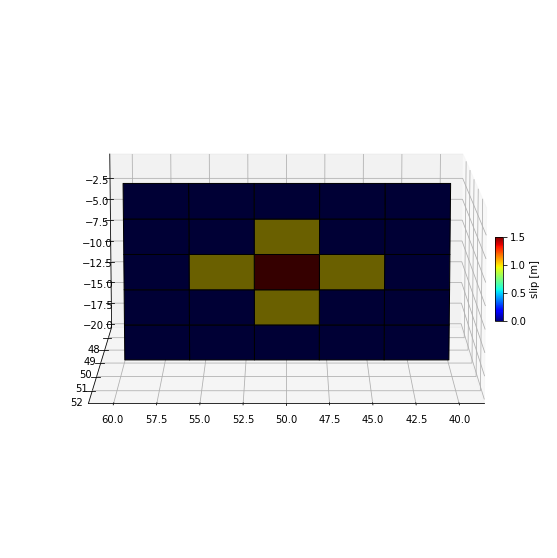

In [164]:
inv.solution = np.concatenate((np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1.5, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), np.zeros(25)))
plot_sources(inv, slip=inv.solution, view=(10, 90), aspect=(2, 2, 1))

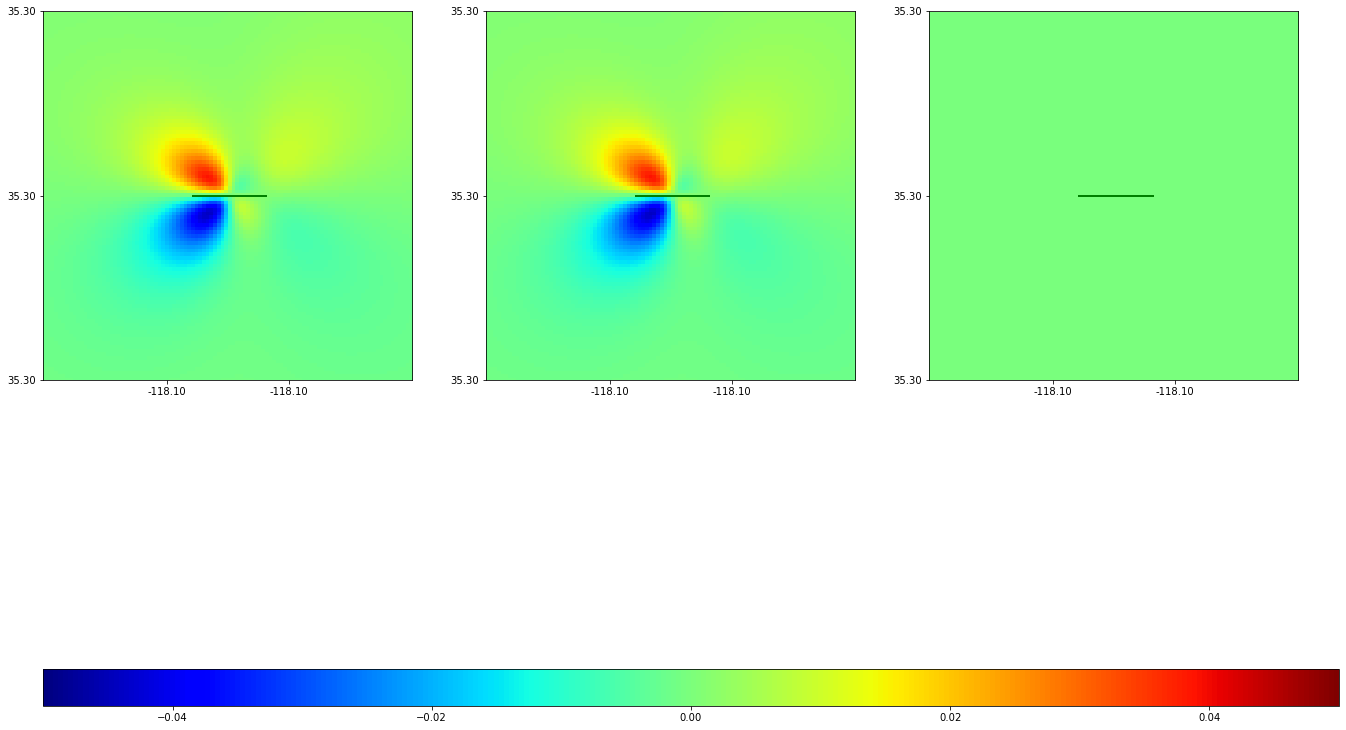

In [107]:
a = inv.plot_sol(vmin=-0.05, vmax=0.05)

In [165]:
X, Y = np.meshgrid(np.arange(100), np.arange(100))

In [166]:
cmin, cmax = -0.05, 0.05
my_cmap = plt.cm.get_cmap('jet')
norm = mlb.colors.Normalize(cmin, cmax)

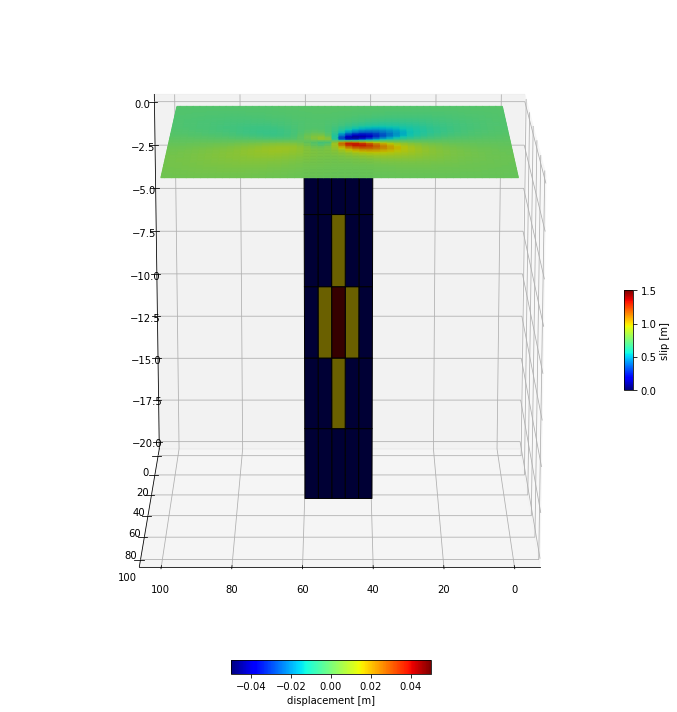

In [167]:
fig, ax = plot_sources(inv, slip=inv.solution, view=(15, 90), aspect=(1, 1, 1))
ax.plot_surface(X, Y, np.zeros_like(X), facecolors=my_cmap(norm(inv.images[0].disp)))
cmmapable = plt.cm.ScalarMappable(norm, my_cmap)
cmmapable.set_array(np.linspace(cmin, cmax))
cbar = plt.colorbar(cmmapable, fraction=0.02, pad=0.01, aspect=15, orientation='horizontal')
cbar.set_label("displacement [m]")
plt.tight_layout()
plt.savefig('model.png')

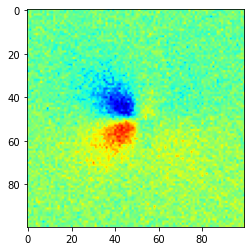

In [122]:
plt.imshow(inv.images[0].disp + np.random.normal(0, 0.005, (100, 100)), cmap='jet', vmin=-0.05, vmax=0.05)

In [183]:
def get_G(inv, G_kw):
    G = inv.images[0].G_ss
    b = np.array([s.disp for s in inv.images[0].station])
    return b, G

In [184]:
inv.images[0].disp += np.random.normal(0, 0.005, (100, 100))
inv.calculate_station_disp()

In [185]:
inv.solve_g(get_G, {})
inv.solution = np.concatenate((inv.solution, np.zeros_like(inv.solution)))

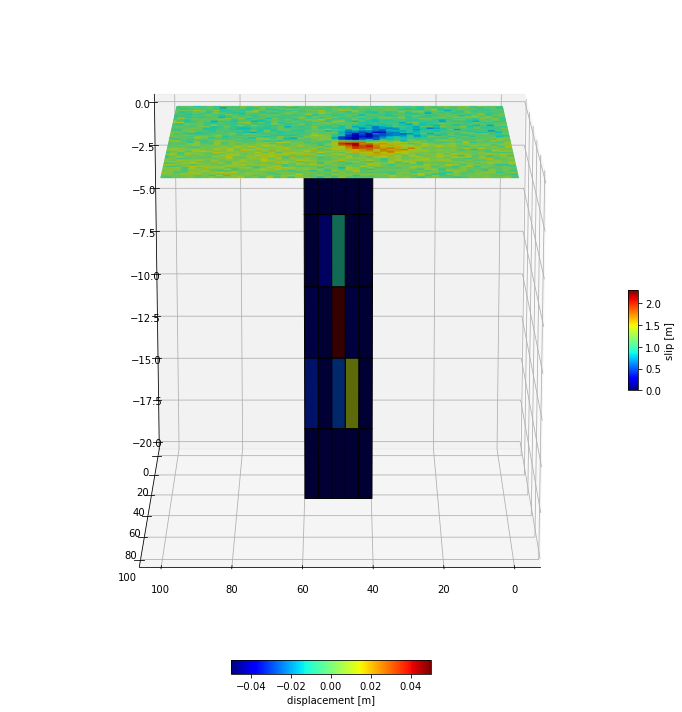

In [186]:
fig, ax = plot_sources(inv, slip=inv.solution, view=(15, 90), aspect=(1, 1, 1))
ax.plot_surface(X, Y, np.zeros_like(X), facecolors=my_cmap(norm(inv.images[0].disp)))
cmmapable = plt.cm.ScalarMappable(norm, my_cmap)
cmmapable.set_array(np.linspace(cmin, cmax))
cbar = plt.colorbar(cmmapable, fraction=0.02, pad=0.01, aspect=15, orientation='horizontal')
cbar.set_label("displacement [m]")
plt.tight_layout()
plt.savefig('model_noise.png')

In [172]:
inv = Inversion('/Users/yohai/workspace/faultSlip/faultSlip/example/simple_inversion/example_2imgs.json')

inv.calculate_station_disp()
# inv.drop_zero_station()
# inv.drop_crossing_station()
inv.build_kers()
inv.build_sources_mat()


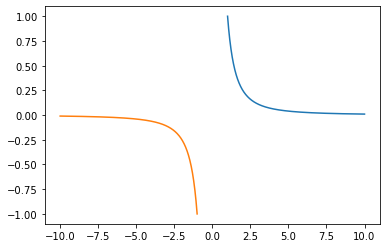

In [191]:
xx = np.linspace(1, 10, 1000)
plt.plot(xx, 1 / xx**2)
plt.plot(-xx, -1 / xx**2)

In [173]:
def get_G(inv, G_kw):
    G1 = inv.images[0].G_ss
    G2 = inv.images[1].G_ss
    b1 = np.array([s.disp for s in inv.images[0].station])
    b2 = np.array([s.disp for s in inv.images[1].station])
    G = np.concatenate((G1, G2), axis=0)
    b = np.concatenate((b1, b2))
    return b, G

In [174]:
inv.solve_g(get_G, {})
inv.solution = np.concatenate((inv.solution, np.zeros_like(inv.solution)))

(<Figure size 432x288 with 2 Axes>,
 <Axes3DSubplot:title={'center':'Total Slip'}>)

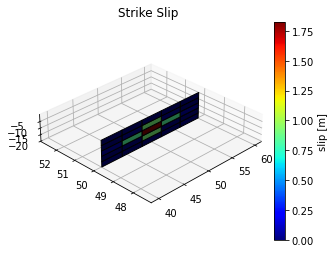

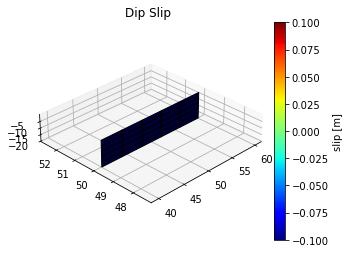

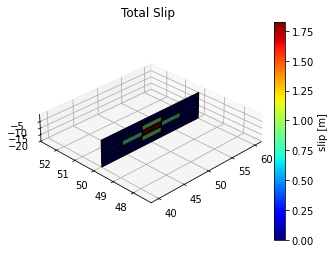

In [175]:
inv.plot_sources()

In [176]:
inv.images[0].disp += np.random.normal(0, 0.005, (100, 100))
inv.images[1].disp += np.random.normal(0, 0.005, (100, 100))
inv.calculate_station_disp()

(<Figure size 432x288 with 2 Axes>,
 <Axes3DSubplot:title={'center':'Total Slip'}>)

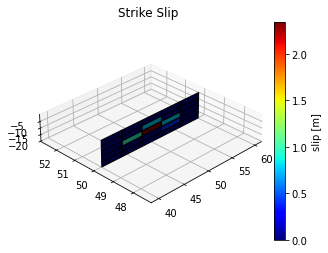

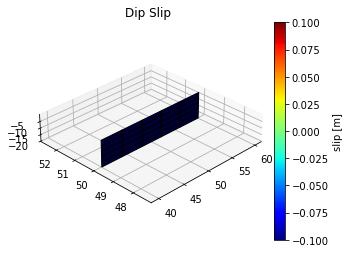

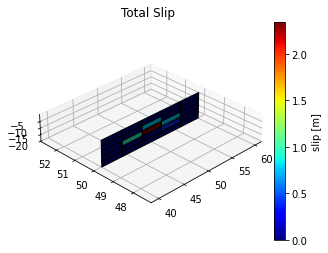

In [177]:
inv.solve_g(get_G, {})
inv.solution = np.concatenate((inv.solution, np.zeros_like(inv.solution)))
inv.plot_sources()

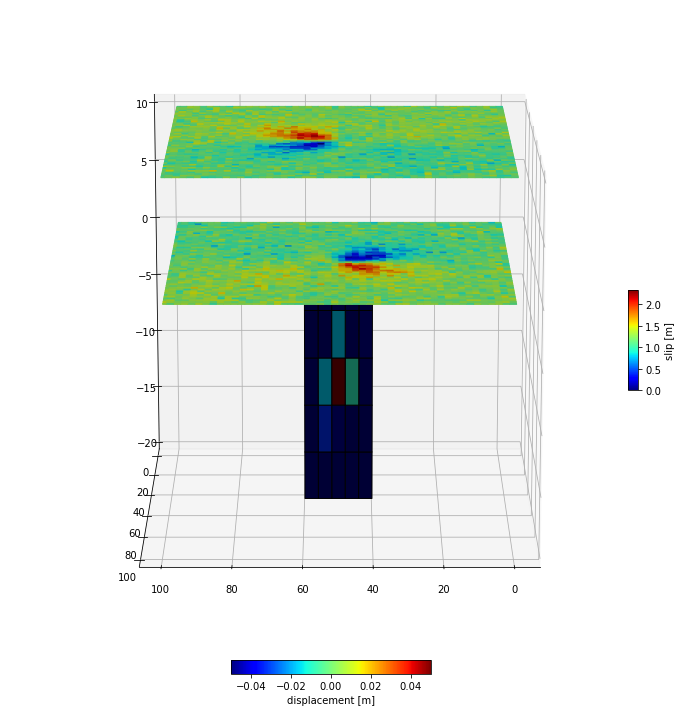

In [178]:
fig, ax = plot_sources(inv, slip=inv.solution, view=(15, 90), aspect=(1, 1, 1))
ax.plot_surface(X, Y, np.zeros_like(X), facecolors=my_cmap(norm(inv.images[0].disp)))
ax.plot_surface(X, Y, np.ones_like(X) * 10, facecolors=my_cmap(norm(inv.images[1].disp)))
cmmapable = plt.cm.ScalarMappable(norm, my_cmap)
cmmapable.set_array(np.linspace(cmin, cmax))
cbar = plt.colorbar(cmmapable, fraction=0.02, pad=0.01, aspect=15, orientation='horizontal')
cbar.set_label("displacement [m]")
plt.tight_layout()
plt.savefig('model_noise_2imgs.png')

In [179]:
def get_G(inv, G_kw):
    beta = G_kw['beta']
    G1 = inv.images[0].G_ss
    G2 = inv.images[1].G_ss
    S = inv.new_smoothing()[:25, :25]
    b1 = np.array([s.disp for s in inv.images[0].station])
    b2 = np.array([s.disp for s in inv.images[1].station])
    G = np.concatenate((G1, G2, S * beta), axis=0)
    b = np.concatenate((b1, b2, np.zeros(S.shape[0])))
    return b, G

(<Figure size 432x288 with 2 Axes>,
 <Axes3DSubplot:title={'center':'Total Slip'}>)

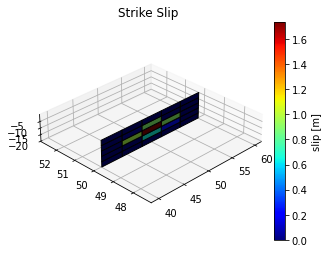

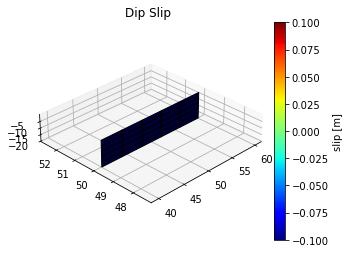

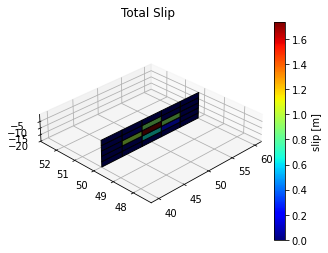

In [180]:
inv.solve_g(get_G, dict(beta=0.0017))
inv.solution = np.concatenate((inv.solution, np.zeros_like(inv.solution)))
inv.plot_sources()

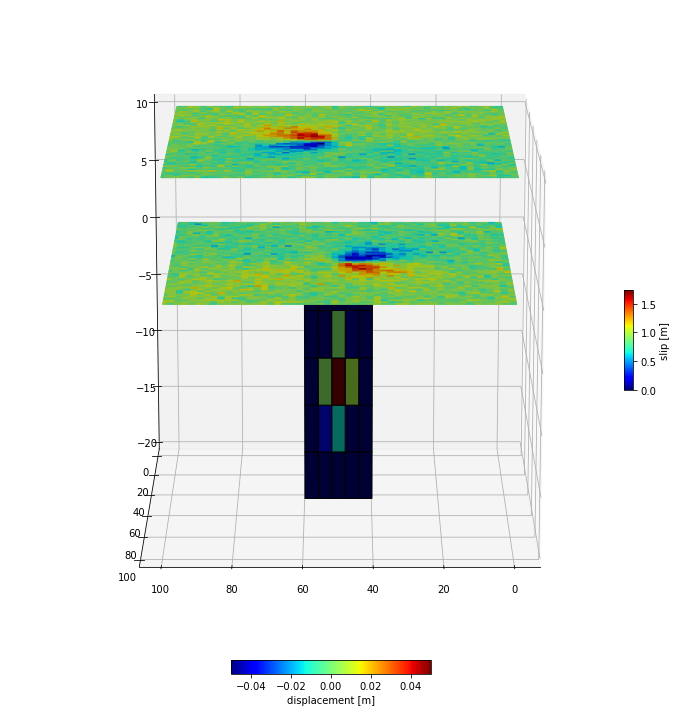

In [181]:
fig, ax = plot_sources(inv, slip=inv.solution, view=(15, 90), aspect=(1, 1, 1))
ax.plot_surface(X, Y, np.zeros_like(X), facecolors=my_cmap(norm(inv.images[0].disp)))
ax.plot_surface(X, Y, np.ones_like(X) * 10, facecolors=my_cmap(norm(inv.images[1].disp)))
cmmapable = plt.cm.ScalarMappable(norm, my_cmap)
cmmapable.set_array(np.linspace(cmin, cmax))
cbar = plt.colorbar(cmmapable, fraction=0.02, pad=0.01, aspect=15, orientation='horizontal')
cbar.set_label("displacement [m]")
plt.tight_layout()
plt.savefig('model_noise_2imgs_with_smoothing.png')